# Visualizar Bodega de datos 

## 1. Cargar Librerias

In [1]:
!pip install matplotlib
!pip install seaborn

!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 26.7 MB/s eta 0:00:00


In [8]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

import string
from sqlalchemy import create_engine, text
import psycopg2
import pandas as pd
import io
import os
from dotenv import load_dotenv



## 2. Conectar Python con PostgreSQL

In [5]:
from Taller1.utils import new_model, engine #abrir el archivo conexion.py

## 3. Comprobar la conexion a la bodega de datos

In [20]:
# consulta sobre la tabla dim_fecha, dim_estacion, dim_polutante, fact_medidad
with engine.connect() as connection:
    result_fecha = connection.execute(text('select * from dim_fecha'))
    df_fecha = pd.DataFrame(result_fecha.fetchall())

    result_estacion = connection.execute(text('select * from dim_estacion'))
    df_estacion = pd.DataFrame(result_estacion.fetchall())

    result_polutante = connection.execute(text('select * from dim_polutante'))
    df_polutante = pd.DataFrame(result_polutante.fetchall())

    result_medida = connection.execute(text('select * from fact_medidad'))
    df_medida = pd.DataFrame(result_medida.fetchall())

In [21]:
df_fecha.head()


,id,dia,mes,anho,hora,fin_semana,festivo
0,1,01,01,2021,01:00:00,False,True
1,2,01,01,2021,02:00:00,False,True
2,3,01,01,2021,03:00:00,False,True
3,4,01,01,2021,04:00:00,False,True
4,5,01,01,2021,05:00:00,False,True


In [15]:
df_estacion.head()


,id,Name,Sigla,Localidad,Latitud,Longitud
0,1,usame,USM,Usme,4.532097,-74.116947
1,2,bolivia,BOL,Engativá,4.735578,-74.125925
2,3,suba,SUB,Suba,4.761222,-74.093433
3,4,tunal,TUN,Tunjuelito,4.576206,-74.130975
4,5,las_ferias,LFR,Engativá,4.690628,-74.082378


In [16]:
df_polutante.head()


,id,PM10,PM2.5,NO,NO2,NOX,CO,OZONO
0,1,56.6,32.7,7.504,15.962,23.493,0.44924,2.431
1,2,59.3,39.3,16.560,17.866,34.426,0.69832,1.121
2,3,96.4,70.8,22.989,17.802,40.791,0.88243,1.172
3,4,108.3,81.0,3.704,9.886,13.591,0.29549,6.565
4,5,87.7,56.1,2.098,9.272,11.371,0.16621,9.513


In [17]:
df_medida.head()

,id,id_estacion,id_tiempo,id_polutante
0,1,1,1,1
1,2,1,2,2
2,3,1,3,3
3,4,1,4,4
4,5,1,5,5


In [ ]:
# se hace una consulta donde se muestra el nombre de la estación junto al dia mes y año en que se tomó la medida

with engine.connect() as connection:
    
	result = connection.execute(text('''
	select e.nombre, t.dia, t.mes, t.anho
	from fact_medidad as m
	join (
		select id, dia, mes, anho
		from dim_fecha
	) as t
	on m.id_tiempo = t.id
		join
		(
		select id, nombre
		from dim_estacion
		) as e
		on m.id_estacion = e.id
	'''))
	df_consulta = pd.DataFrame(result.fetchall())
	# se cambia el nombre a las columnas
	df_consulta = df_consulta.rename(columns={'anho': 'año'})


df_consulta



,nombre,dia,mes,año
0,tunal,31,12,2021
1,tunal,31,12,2021
2,tunal,31,12,2021
3,tunal,31,12,2021
4,tunal,31,12,2021
...,...,...,...,...
166435,kennedy,01,01,2021
166436,kennedy,01,01,2021
166437,kennedy,01,01,2021
166438,kennedy,01,01,2021


In [23]:
#haga una nueva consulta

# Traer las estaciones organizadas por cantidad de mediciones realizadas y valor promedio de CO y NOX para cada estación.

with engine.connect() as connection:
    
	result = connection.execute(text('''

        SELECT e.nombre, count(m.id_polutante) as "Numero de mediciones", avg(p."CO") as "Promedio CO", avg(p."NOX") as "Promedio NOX"
		FROM fact_medidad as m
		JOIN(
			SELECT id, "CO", "NOX" 
			FROM dim_polutante
		) as p
		ON m.id_polutante = p.id
		JOIN(
			SELECT id, nombre
			FROM dim_estacion
		) as e
		ON m.id_estacion = e.id
		GROUP BY e.nombre
		ORDER BY "Numero de mediciones" DESC 			
	'''))
	df_consulta_2 = pd.DataFrame(result.fetchall())

df_consulta_2

,nombre,Numero de mediciones,Promedio CO,Promedio NOX
0,bolivia,8760,0.430663,32.934524
1,carvajal_sevillana,8760,1.773517,33.590300
2,centro_alto_rendimiento,8760,0.529904,27.681950
3,ciudad_bolivar,8760,0.609754,31.851215
4,colina,8760,0.470260,26.394372
5,el_jazmin,8760,0.607729,32.401024
6,fontibon,8760,0.574998,31.294941
7,guaymaral,8760,0.442225,38.445786
8,kennedy,8760,0.874671,41.111922
9,las_ferias,8760,0.746322,32.522605


## 4. Visualizar datos desde la bodeda de datos 

<Axes: xlabel='PM2.5'>

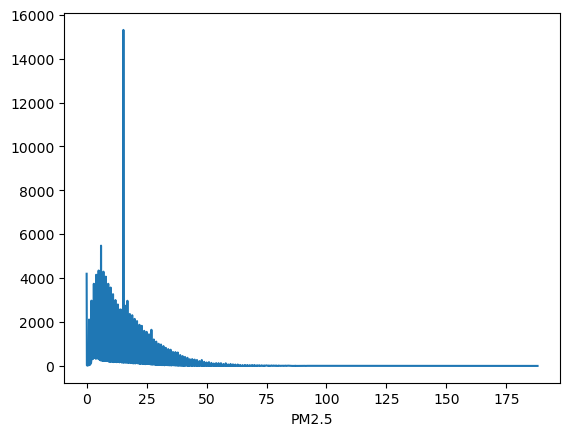

In [24]:
df_polutante['PM2.5'].value_counts().sort_index().plot.line()


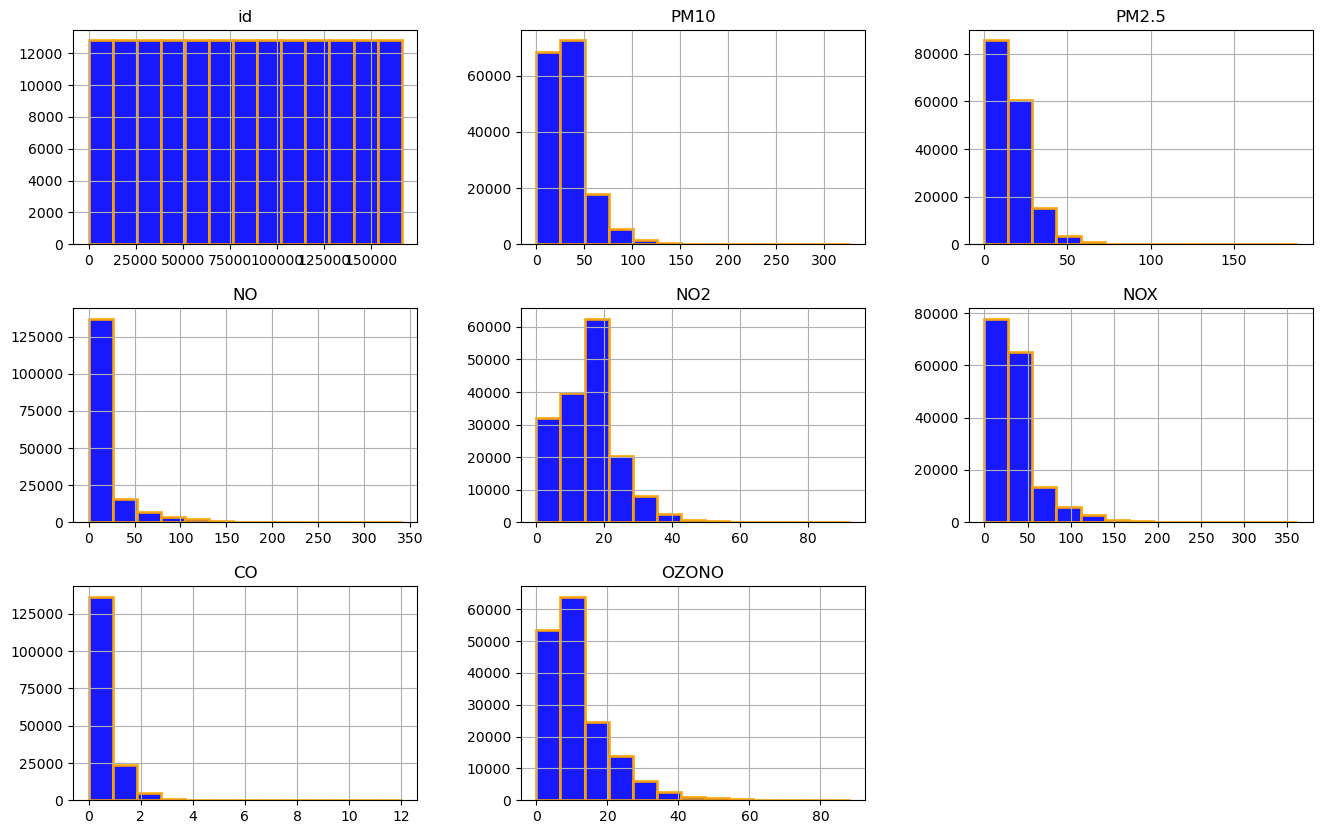

In [25]:
df_polutante.hist(figsize=(16,10),facecolor='blue', alpha=0.9, bins=13, edgecolor='orange', linewidth=2)
plt.show()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO
PM10,1.000000,0.759310,0.263536,0.334306,0.338860,0.459526,-0.032092
PM2.5,0.759310,1.000000,0.278237,0.388426,0.368569,0.504338,-0.053075
NO,0.263536,0.278237,1.000000,0.191043,0.952026,0.399196,-0.278493
NO2,0.334306,0.388426,0.191043,1.000000,0.477759,0.382771,-0.312026
NOX,0.338860,0.368569,0.952026,0.477759,1.000000,0.475125,-0.345144
CO,0.459526,0.504338,0.399196,0.382771,0.475125,1.000000,-0.259279
OZONO,-0.032092,-0.053075,-0.278493,-0.312026,-0.345144,-0.259279,1.000000


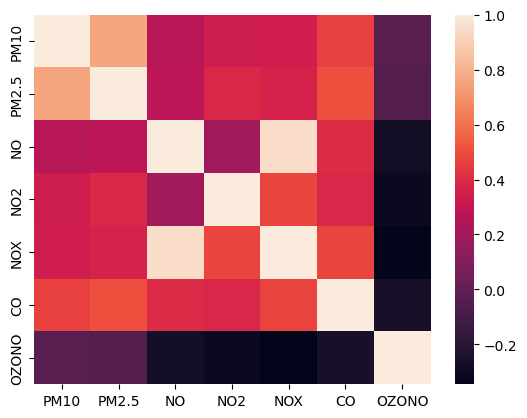

In [26]:
#Correlation Matrix
del(df_polutante['id'])
corr = df_polutante.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

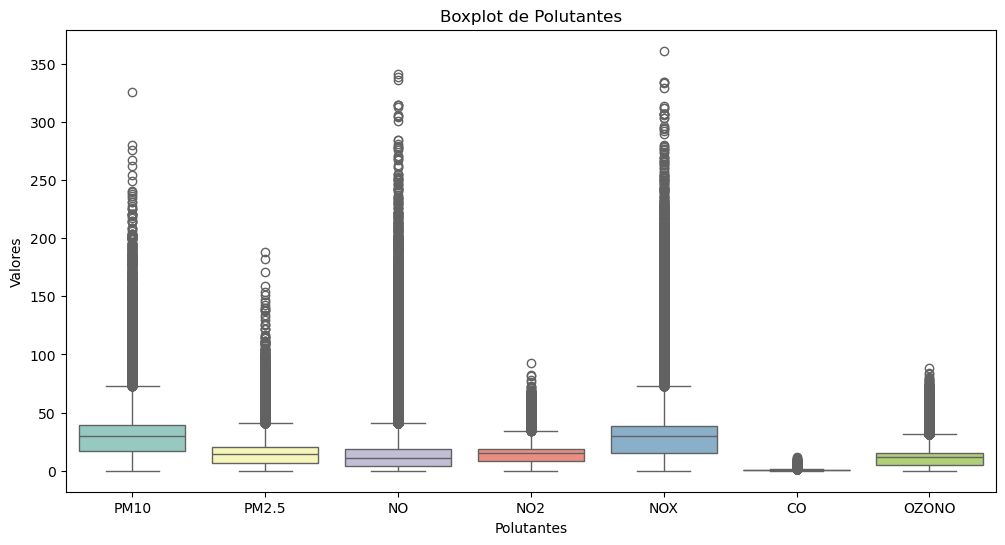

In [29]:
# cree una nueva  grafica, la que usted quiera

# boxplot de polutantes
plt.figure(figsize=(12,6))
sns.boxplot(data=df_polutante, palette="Set3")
plt.title("Boxplot de Polutantes")
plt.xlabel("Polutantes")
plt.ylabel("Valores")
plt.show()